In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Pobranie danych z repozetorum UCI ze storny: https://archive.ics.uci.edu 

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease'
nameOfData = '/processed.cleveland.data'
url = path + nameOfData

df_raw = pd.read_csv(url, header = None) 

'''
Nadanie kolumną odpowiednich nazw 
względem podanych informacji na stronie w pliku heart-disease.names:
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
'''
df_raw.columns = ['age', 'sex', 'cp', 
               'trestbps', 'chol', 'fbs',
               'restecg', 'thalach', 'exang', 
               'oldpeak', 'slope', 'ca',
               'thal', 'target']


In [8]:
df = df_raw.copy()
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


Opis kolumn znajdujący się w pliku https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names

- 1. age: age in years
- 2. sex: sex 
        - Value 1 = male 
        - Value 0 = female     
- 3. cp: chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic      
- 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- 5. chol: serum cholestoral in mg/dl      
- 6. fbs: fasting blood sugar > 120 mg/dl 
        - Value 1:true
        - Value 0: false     
- 7. restecg: resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
- 8. thalach: resting heart rate   
- 9. exang: exercise induced angina 
        - Value 1: yes
        - Value 0: no   
- 10. oldpeak:  ST depression induced by exercise relative to rest
- 11. slope: the slope of the peak exercise ST segment
        - Value 1: upsloping
        - Value 2: flat
        - Value 3: downsloping   
- 12. ca:  number of major vessels (0-3) colored by flourosopy     
- 13. thal:  
        - Value 3:  normal; 
        - Value 6: fixed defect; 
        - Value 7: reversable defect    
- 14. target: 
Displays whether the individual is suffering  from heart disease or not :
        - 0 = absence
        - 1, 2, 3, 4 = present.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [36]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        5
dtype: int64

In [37]:
category_cols = ['sex','cp','fbs','restecg','exang','slope','thal']

In [38]:
#W zbiorze tym wartości puste są zaznaczone znakiem '?'
check_cols =category_cols+ ['ca']
for i in check_cols:
    print(50*'-'+'\n' + str(df[f'{i}'].value_counts()));

--------------------------------------------------
1.0    206
0.0     97
Name: sex, dtype: int64
--------------------------------------------------
4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64
--------------------------------------------------
0.0    258
1.0     45
Name: fbs, dtype: int64
--------------------------------------------------
0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64
--------------------------------------------------
0.0    204
1.0     99
Name: exang, dtype: int64
--------------------------------------------------
1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64
--------------------------------------------------
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64
--------------------------------------------------
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64


In [39]:
df.loc[df['sex'] == 0, 'sex'] = 'female'
df.loc[df['sex'] == 1, 'sex'] = 'male'

df.loc[df['cp'] == 1, 'cp'] = 'typical angina'
df.loc[df['cp'] == 2, 'cp'] = 'atypical angina'
df.loc[df['cp'] == 3, 'cp'] = 'non-anginal pain'
df.loc[df['cp'] == 4, 'cp'] = 'asymptomatic'

df.loc[df['fbs'] == 0, 'fbs'] = 'lower than 120mg/ml'
df.loc[df['fbs'] == 1, 'fbs'] = 'greater than 120mg/ml'

df.loc[df['restecg'] == 0, 'restecg'] = 'normal'
df.loc[df['restecg'] == 1, 'restecg'] = 'ST-T wave abnormality'
df.loc[df['restecg'] == 2, 'restecg'] = 'left ventricular hypertrophy'

df.loc[df['exang'] == 0,'exang'] = 'no'
df.loc[df['exang'] == 1,'exang'] = 'yes'

df.loc[df['slope'] == 1, 'slope'] = 'upsloping'
df.loc[df['slope'] == 2, 'slope'] = 'flat'
df.loc[df['slope'] == 3, 'slope'] = 'downsloping'

df.loc[df['thal'].str.contains('3'), 'thal'] = 'normal'
df.loc[df['thal'].str.contains('6'), 'thal'] = 'fixed defect'
df.loc[df['thal'].str.contains('7'), 'thal'] = 'reversable defect'
df.loc[df['thal'].str.contains('\?'),'thal'] = np.nan

df.loc[df['ca'].str.contains('\?'),'ca'] = np.nan

Zmiana typów danych

In [40]:
col_category = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'thal']
for col in col_category:
    df[col] = df[col].astype('category')
    
df['ca'] = df['ca'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    float64 
 12  thal      301 non-null    category
 13  target    303 non-null    int64   
dtypes: category(7), float64(6), int64(1)
memory usage: 19.5 KB


In [41]:
#W zbiorze tym wartości puste są zaznaczone znakiem '?'
for i in category_cols:
    print(50*'-'+'\n' + str(df[f'{i}'].value_counts()))

--------------------------------------------------
male      206
female     97
Name: sex, dtype: int64
--------------------------------------------------
asymptomatic        144
non-anginal pain     86
atypical angina      50
typical angina       23
Name: cp, dtype: int64
--------------------------------------------------
lower than 120mg/ml      258
greater than 120mg/ml     45
Name: fbs, dtype: int64
--------------------------------------------------
normal                          151
left ventricular hypertrophy    148
ST-T wave abnormality             4
Name: restecg, dtype: int64
--------------------------------------------------
no     204
yes     99
Name: exang, dtype: int64
--------------------------------------------------
upsloping      142
flat           140
downsloping     21
Name: slope, dtype: int64
--------------------------------------------------
normal               166
reversable defect    117
fixed defect          18
Name: thal, dtype: int64


In [1]:
df.head()

NameError: name 'df' is not defined

Zmiana wartości w danych

# Operacja na kolumnie target

In [19]:
df.target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [20]:
vcounts = df.target.value_counts()
print("Histogram wartości w kolumnie:");
print(vcounts);
print(f'\nOsoby bez ataku serca: {vcounts[0]}\nOsoby z atakiem serca: {vcounts[1:].sum()}');
print('Odpowiada to stosunkowi klas które są podane na stornie...');

Histogram wartości w kolumnie:
0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

Osoby bez ataku serca: 164
Osoby z atakiem serca: 139
Odpowiada to stosunkowi klas które są podane na stornie...


# Przetwania danych 
Przekształcenie kolumny target w taki sposób by przechowywała jedynie dwie wartości 
- 0 jako osoba zdorwa
- 1 jako osoba chora

Unikatowe wartości po trasformacji:
[0 1]

Histogram wartości w kolumnie:
0    164
1    139
Name: target, dtype: int64


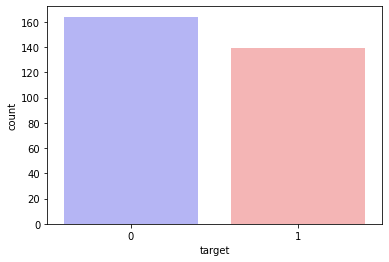

In [21]:
#Slownik zawierajacy informacje o chorych i zdrowych
transformationDict = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
df['target'] = df['target'].map(transformationDict)
print('Unikatowe wartości po trasformacji:')
print(df['target'].unique())

vcounts = df['target'].value_counts()
print("\nHistogram wartości w kolumnie:");
print(vcounts);
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [22]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,male,typical angina,145.0,233.0,greater than 120mg/ml,left ventricular hypertrophy,150.0,no,2.3,downsloping,0.0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,lower than 120mg/ml,left ventricular hypertrophy,108.0,yes,1.5,flat,3.0,normal,1
2,67.0,male,asymptomatic,120.0,229.0,lower than 120mg/ml,left ventricular hypertrophy,129.0,yes,2.6,flat,2.0,reversable defect,1
3,37.0,male,non-anginal pain,130.0,250.0,lower than 120mg/ml,normal,187.0,no,3.5,downsloping,0.0,normal,0
4,41.0,female,atypical angina,130.0,204.0,lower than 120mg/ml,left ventricular hypertrophy,172.0,no,1.4,upsloping,0.0,normal,0
5,56.0,male,atypical angina,120.0,236.0,lower than 120mg/ml,normal,178.0,no,0.8,upsloping,0.0,normal,0
6,62.0,female,asymptomatic,140.0,268.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,3.6,downsloping,2.0,normal,1
7,57.0,female,asymptomatic,120.0,354.0,lower than 120mg/ml,normal,163.0,yes,0.6,upsloping,0.0,normal,0
8,63.0,male,asymptomatic,130.0,254.0,lower than 120mg/ml,left ventricular hypertrophy,147.0,no,1.4,flat,1.0,reversable defect,1
9,53.0,male,asymptomatic,140.0,203.0,greater than 120mg/ml,left ventricular hypertrophy,155.0,yes,3.1,downsloping,0.0,reversable defect,1


# Usuwanie brakujących warotści

In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [24]:
df = df.dropna()


Histogram wartości w kolumnie:
0    160
1    137
Name: target, dtype: int64


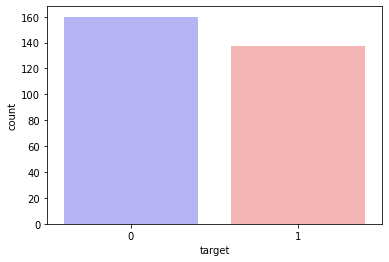

In [25]:
vcounts = df['target'].value_counts()
print("\nHistogram wartości w kolumnie:");
print(vcounts);
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [26]:
!mkdir dane

In [27]:
df.to_csv('./dane/HeartDiseaseDataSet.csv',index=False)